In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import os
import glob
from imaging_interview import preprocess_image_change_detection, compare_frames_change_detection, draw_color_mask
import cv2
import imutils

In [3]:
base_path = './test/dataset/'
files = sorted(glob.glob(os.path.join(base_path, '*.png')))
print(len(files))

815


### Check image

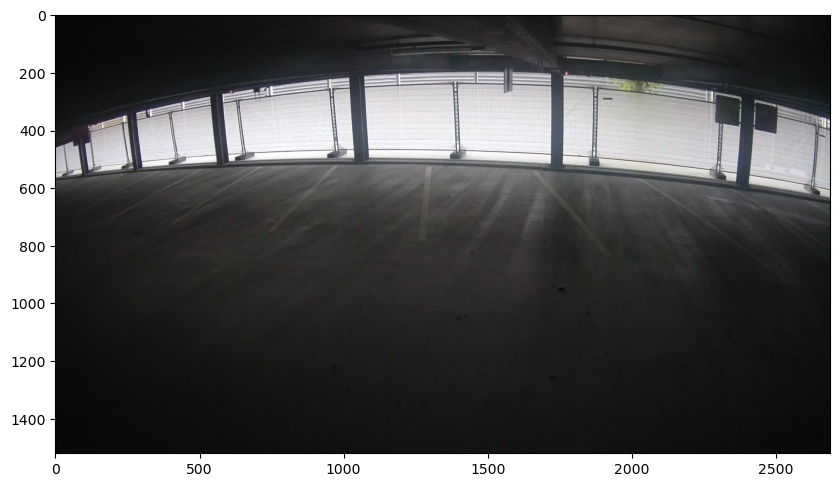

In [11]:
img = cv2.imread(files[0])
imshow(img[:,:,::-1])

### Compare two images

./test/dataset/c10-1623871098865.png ./test/dataset/c10-1623871124416.png


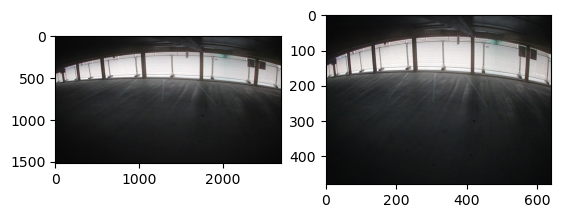

In [8]:
print(files[0], files[1])
subplot(1,2,1)
imshow(cv2.imread(files[0]))
subplot(1,2,2)
imshow(cv2.imread(files[1]))

## Testing black border

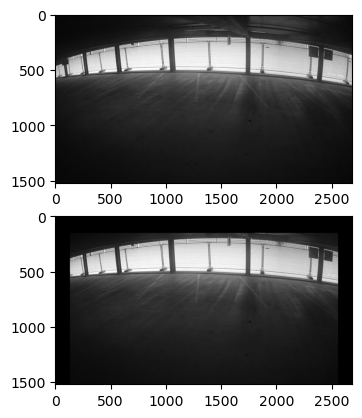

In [9]:
test_img = cv2.imread(files[0])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

subplot(2,1,1)
imshow(test_img, cmap='gray')

# test_img = np.ones((1080,1920))

black_mask=(5, 10, 5, 0)
subplot(2,1,2)
imshow(draw_color_mask(test_img, (5, 10, 5, 0)), cmap='gray')


### Comparison of different radius values of Gaussian Blur

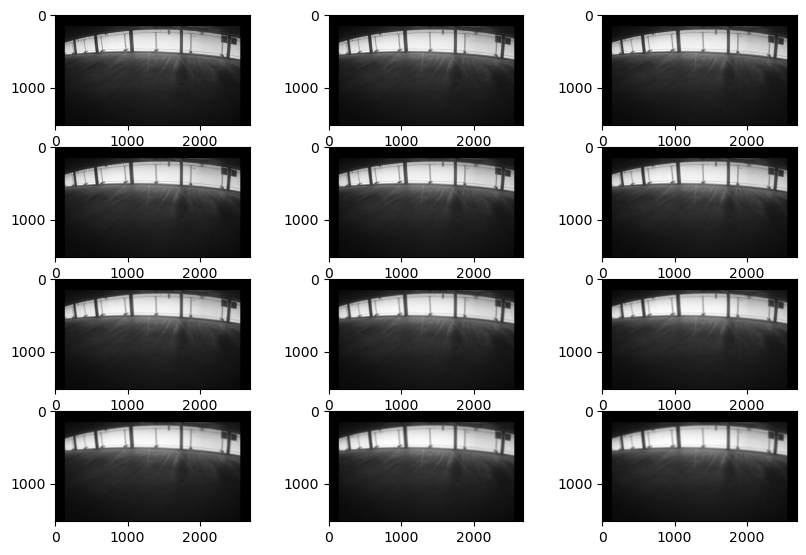

In [10]:
i = 1
test_img = cv2.imread(files[0])
rads = [1,3,5,7,9, 11, 13, 15, 17, 19, 21, 23]

for rad in rads:
    
    prev_frame = preprocess_image_change_detection(test_img, [rad]*4)
    figsize(10,10)
    subplot(len(rads)//2,3,i)
    imshow(prev_frame, cmap='gray')
    cv2.imwrite(f"prev_img_{rad}-2.png",prev_frame,)
    i+=1

### Testing of the scores values w.r.t to different gaussian blur radius values.

In [104]:

min_contour_area = 100  
similarity_threshold = 1000  
number = 4


image1 = cv2.imread(files[0])

for i in range(1, len(files)):
    for rad in [1,3,5,7,9, 11, 13, 15, 17, 19, 21, 23]:
        
        prev_frame = preprocess_image_change_detection(image1, [rad]*number)
        next_frame = preprocess_image_change_detection(cv2.imread(files[i]), [rad]*number)

        if prev_frame.shape[0]!=next_frame.shape[0] or prev_frame.shape[1]!=next_frame.shape[1]:

            if prev_frame.shape[0] < next_frame.shape[0]:
                next_frame = cv2.resize(next_frame, prev_frame.shape[::-1], interpolation = cv2.INTER_LINEAR)
            else:
                prev_frame = cv2.resize(prev_frame, next_frame.shape[::-1], interpolation = cv2.INTER_LINEAR)

        score, _, _ = compare_frames_change_detection(prev_frame, next_frame, min_contour_area)

        print(rad, score)

    
    break

1 14867.0
3 10439.5
5 7831.5
7 5511.0
9 5601.5
11 5558.0
13 5800.5
15 6797.0
17 7865.0
19 8150.5
21 8269.5
23 8247.0


### Compare score of two differnt images

In [ ]:
a = "/home/akash/Personal/Kopernikus/interview_challenge_per (1)/interview_challenge_per/test/dataset/c10-1623872200494.png"
b = "/home/akash/Personal/Kopernikus/interview_challenge_per (1)/interview_challenge_per/test/dataset/c10-1623872544167.png"

number = 10

for min_contour_area in [10, 100, 1000, 10000, 100000]:

    rads = [1, 3, 5, 9, 11, 13, 15, 17, 19, 21, 23]

    for rad in rads:

        prev_frame = preprocess_image_change_detection(cv2.imread(a), rads*number)
        next_frame = preprocess_image_change_detection(cv2.imread(b), rads*number)

        if prev_frame.shape[0]!=next_frame.shape[0] or prev_frame.shape[1]!=next_frame.shape[1]:

            if prev_frame.shape[0] < next_frame.shape[0]:
                next_frame = cv2.resize(next_frame, prev_frame.shape[::-1], interpolation = cv2.INTER_CUBIC)
            else:
                prev_frame = cv2.resize(prev_frame, next_frame.shape[::-1], interpolation = cv2.INTER_CUBIC)

        score, _, _ = compare_frames_change_detection(prev_frame, next_frame, min_contour_area)
        print(f"Area {min_contour_area}, rad {rad}, score {score}")
        

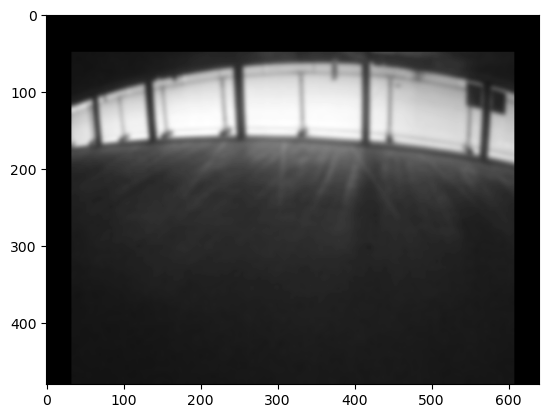

In [15]:
imshow(prev_frame, cmap='gray')

### Test the code for removing the same images.

In [175]:
min_contour_area = 100  # Adjust as needed
similarity_threshold = 50000  # Adjust as needed
number = 4
deleted_files = 0

image1 = cv2.imread(files[0])
prev_frame = preprocess_image_change_detection(image1)

for i in range(1, len(files)):
#     for rad in [1,3,5,7,9, 11, 13, 15, 17, 19, 21, 23]:
        
#         prev_frame = preprocess_image_change_detection(image1)#, [rad]*number)
#     print(files[i])
    next_frame = preprocess_image_change_detection(cv2.imread(files[i]))#, [rad]*number)

    if prev_frame.shape[0]!=next_frame.shape[0] or prev_frame.shape[1]!=next_frame.shape[1]:

        if prev_frame.shape[0] < next_frame.shape[0]:
            next_frame = cv2.resize(next_frame, prev_frame.shape[::-1], interpolation = cv2.INTER_LINEAR)
        else:
            prev_frame = cv2.resize(prev_frame, next_frame.shape[::-1], interpolation = cv2.INTER_LINEAR)


    score, _, _ = compare_frames_change_detection(prev_frame, next_frame, min_contour_area)
    print(score)

    if score < similarity_threshold:
#         print(f"Similar images found: {image1_name} and {image2_name}")
        # Remove one of the images (you can implement this part)
        os.remove(files[i])
        deleted_files += 1

        

    prev_frame = next_frame
    

print(deleted_files)

14867.0
0
0
0
168.5
196228.0
4754.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1955.0
110.0
0
81423.5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1732.0
54832.5
63264.5
87227.5
69979.0
55172.5
49032.5
43953.0
39011.5
33565.5
30640.0
26927.5
25383.5
24055.5
23641.0
19345.0
16977.0
53906.5
3821.5
12218.0
13454.5
9512.0
8128.0
6457.0
4510.5
3245.0
11513.0
13023.0
225738.5
44563.5
0
908.0
924.5
2813.0
2981.0
30002.0
33947.5
1425.0
2687.0
53787.5
65600.0
4133.5
20988.0
48065.5
64977.0
10014.5
13511.0
17292.5
22796.5
28648.5
29273.0
28066.5
36694.5
43072.5
35749.5
28973.0
28766.0
25185.0
14157.0
10972.0
12581.5
3784.5
119.0
105520.0
6014.0
4390.5
154877.5
2227.0
29805.0
98436.5
11965.5
1103.5
32652.5
3332.5
26286.5
153507.5
1740.0
9347.5
18414.0
8113.5
2483.0
20811.5
2625.5
19329.5
5223.0
7017.5
7416.0
3749.5
19148.0
18299.5
20306.0
2056.0
15857.0
54140.0
9129.5
4052.0
2420.0
68970.5
6174.5
16657.5
41595.5
1

AttributeError: 'NoneType' object has no attribute 'copy'

### Test the code of comparision of images.

In [100]:
a = "/home/akash/Personal/Kopernikus/interview_challenge_per (1)/interview_challenge_per/test/dataset/c10-1623872200494.png"
b = "/home/akash/Personal/Kopernikus/interview_challenge_per (1)/interview_challenge_per/test/dataset/c10-1623872544167.png"

In [167]:
rads = [1,3,5,7,9, 11, 13]

rads = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

prev_frame = preprocess_image_change_detection(cv2.imread(a), rads)
next_frame = preprocess_image_change_detection(cv2.imread(b), rads)

frame_delta = cv2.absdiff(prev_frame, next_frame)
thresh = cv2.threshold(frame_delta, 45, 255, cv2.THRESH_BINARY)[1]

thresh = cv2.dilate(thresh, None, iterations=2)
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

score = 0
res_cnts = []
for c in cnts:
    if cv2.contourArea(c) < min_contour_area:
        continue

    res_cnts.append(c)
    score += cv2.contourArea(c)


In [168]:
np.sum(frame_delta)

16414994

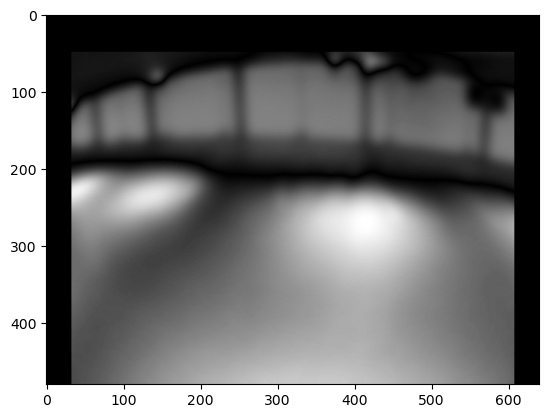

In [169]:
imshow(frame_delta, cmap='gray')

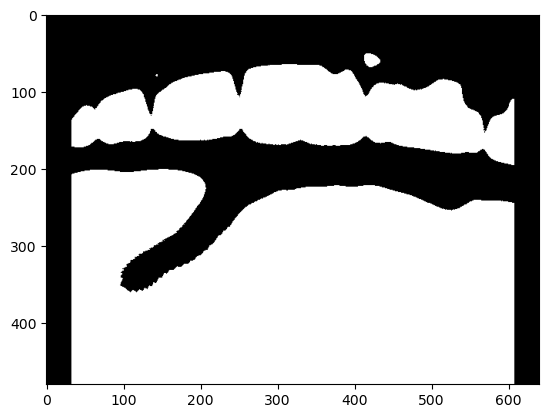

In [170]:
thresh = cv2.threshold(frame_delta, 45, 255, cv2.THRESH_BINARY)[1]
imshow(thresh, cmap='gray')

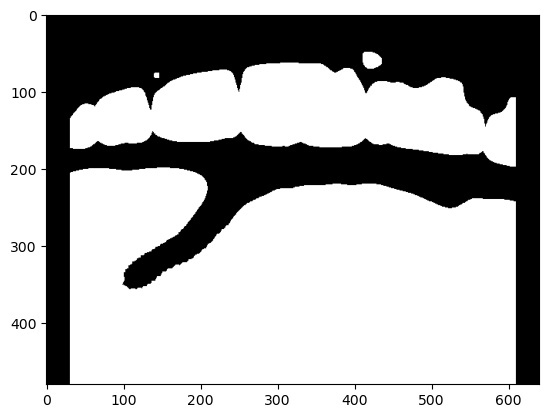

In [171]:
thresh = cv2.dilate(thresh, None, iterations=2)
imshow(thresh, cmap='gray')

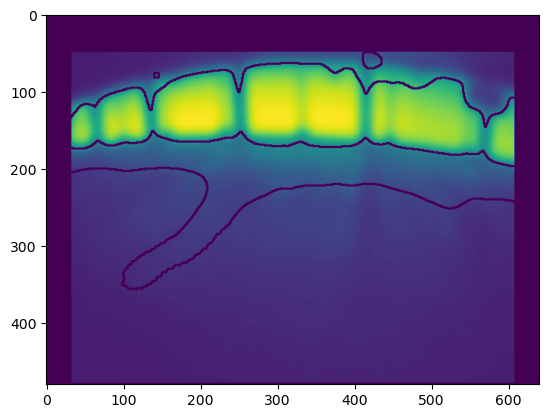

In [172]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)

contour_image = cv2.drawContours(prev_frame.copy(), cnts[0], -1, (0, 255, 0), 2)
imshow(contour_image)

In [173]:
cnts = imutils.grab_contours(cnts)

for c in cnts:
    print(cv2.contourArea(c))

141115.5
35.0
46778.5
416.5


In [174]:
score = 0
res_cnts = []
min_contour_area = 1000

for c in cnts:
    if cv2.contourArea(c) < min_contour_area:
        continue

    res_cnts.append(c)
    score += cv2.contourArea(c)

print(score)

187894.0
